## Introducción

Este análisis exploratorio de datos (EDA) tiene como objetivo identificar oportunidades de inversión inmobiliaria en Málaga. Se analizarán métricas clave como ROI, precios por metro cuadrado, ocupación estimada y estrategias de diferenciación para hosts existentes.

### Objetivos Específicos:
1. Identificar las zonas más rentables para inversión inmobiliaria.
2. Analizar la relación entre precios, ocupación y rentabilidad.
3. Proponer estrategias de diferenciación basadas en amenities y seguridad.

## Índice

1. [Inicialización del EDA y Descripción General del Dataset](#inicialización-del-eda-y-descripción-general-del-dataset)
   - [Importar Librerías y Cargar el Dataset](#importar-librerías-y-cargar-el-dataset)
   - [Validación de Carga del Dataset](#validación-de-carga-del-dataset)
   - [Descripción General del Dataset](#descripción-general-del-dataset)
2. [Cálculo de ROI](#cálculo-de-roi)
   - [Visualización del ROI Bruto y Neto por Zona](#visualización-del-roi-bruto-y-neto-por-zona)
   - [Relación entre ROI, Precio por Metro Cuadrado y Ocupación](#relación-entre-roi-precio-por-metro-cuadrado-y-ocupación)
3. [Dashboard Integrado con Filtros Dinámicos](#dashboard-integrado-con-filtros-dinámicos)
4. [Análisis de Mercado y Oportunidades de Entrada](#análisis-de-mercado-y-oportunidades-de-entrada)
   - [Distribución de Precios por Zona y Tipo de Propiedad](#distribución-de-precios-por-zona-y-tipo-de-propiedad)
   - [Ocupación Estimada por Zona](#ocupación-estimada-por-zona)
5. [Análisis de Amenities y Estrategias de Diferenciación](#análisis-de-amenities-y-estrategias-de-diferenciación)
6. [Benchmarking Competitivo](#benchmarking-competitivo)
   - [Análisis de Correlación entre Métricas Clave](#análisis-de-correlación-entre-métricas-clave)
7. [Análisis de Precios por Metro Cuadrado](#análisis-de-precios-por-metro-cuadrado)
8. [Integración de Datos Adicionales](#integración-de-datos-adicionales)
   - [Análisis de Estadísticas de Crimen en Málaga](#análisis-de-estadísticas-de-crimen-en-málaga)
   - [Visualización de Tipos de Crimen](#visualización-de-tipos-de-crimen)
   - [Análisis Temporal de Crimen](#análisis-temporal-de-crimen)
9. [Resumen Visual de Zonas Recomendadas](#resumen-visual-de-zonas-recomendadas)
10. [Conclusiones y Próximos Pasos](#conclusiones-y-próximos-pasos)

## Inicialización del EDA y Descripción General del Dataset

En esta sección se importan las librerías necesarias, se carga el dataset preprocesado (`malaga_listings_clean.csv`) y se realiza una primera exploración de sus características principales. Se mostrarán las primeras filas, el tamaño del dataset, los tipos de datos, la presencia de valores nulos y estadísticas descriptivas básicas, acompañadas de visualizaciones para facilitar la comprensión inicial de la información disponible.

### Importar Librerías y Cargar el Dataset
En esta sección, se importarán las librerías necesarias y se cargará el dataset preprocesado (`malaga_listings_clean.csv`) para realizar el análisis exploratorio de datos.

In [1]:
# Importar librerías necesarias
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Configuración de visualizaciones
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)



### Validación de Carga del Dataset
Se agregó una validación para verificar si el archivo existe antes de cargarlo. Esto asegura que el análisis no se detenga por errores relacionados con la falta del archivo.

In [2]:
# Validar si el archivo existe antes de cargarlo
file_path = '/Users/patriciajaquez/Documents/Documents - Patricia’s MacBook Pro/GitHub/Analisis-de-inversion-inmobiliario/data/malaga_listings_clean.csv'

if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print("Dataset cargado exitosamente.")
else:
    print(f"Error: El archivo '{file_path}' no existe. Verifica la ruta.")
df = pd.read_csv(file_path)

# Verificar el tamaño del dataset
print("\nTamaño del dataset:")
display(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")

# Mostrar todas las columnas del DataFrame
pd.set_option('display.max_columns', None)

# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
display(df.head(3))

Dataset cargado exitosamente.

Tamaño del dataset:


'Filas: 9621, Columnas: 86'

Primeras filas del dataset:


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_group,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,city,price_per_m2,monthly_variation,quarterly_variation,annual_variation,historical_max,historical_max_date,historical_max_variation
0,96033,https://www.airbnb.com/rooms/96033,20250328164700,2025-03-29,city scrape,"Bonito piso a 200m de la playa, El Palo (Málaga)",Do you have a backpacker spirit and are lookin...,"200 metres from the beaches of El Palo, Malaga...",https://a0.muscache.com/pictures/hosting/Hosti...,510467,https://www.airbnb.com/users/show/510467,Rafael,2011-04-15,"Andalusia, Spain",¡Hola! Gracias por acercarte a nosotros y enca...,within an hour,1.0,1.00,False,https://a0.muscache.com/im/pictures/user/59fb2...,https://a0.muscache.com/im/pictures/user/59fb2...,no_data,1,1,"['email', 'phone']",t,True,Este,Este,36.720310,-4.356270,Entire rental unit,Entire home/apt,3,1.0,1 bath,2,2,"[""High chair"", ""Coffee"", ""Conditioner"", ""Dishe...",54.0,3,180,3,3,1125,1125,3.0,1125.0,no_data,True,14,37,48,259,2025-03-29,250,39,1,25,37,234,12636.0,2013-10-18,2025-03-01,4.60,4.71,4.61,4.88,4.93,4.43,4.59,VUT/MA/22043,False,1,1,0,0,1.79,Malaga,4466.0,0.3,4.1,10.8,4466.0,jun 2025,0.0
1,166473,https://www.airbnb.com/rooms/166473,20250328164700,2025-03-29,city scrape,Perfect Location In Malaga,This apartment is rented out by the room - new...,no_data,https://a0.muscache.com/pictures/miso/Hosting-...,793360,https://www.airbnb.com/users/show/793360,Fred,2011-07-08,"El Faro, Spain","Hi All, my name is Fred and I am half Swedish ...",within a few hours,1.0,0.72,False,https://a0.muscache.com/im/pictures/user/f2d8a...,https://a0.muscache.com/im/pictures/user/f2d8a...,no_data,5,5,"['email', 'phone']",t,True,Este,Este,36.720310,-4.361080,Private room in rental unit,Private room,1,2.0,2 shared baths,1,4,"[""Dryer"", ""Dishes and silverware"", ""Private en...",22.0,5,365,5,5,365,1000,5.0,480.7,no_data,True,0,0,26,301,2025-03-29,101,4,0,261,6,40,880.0,2011-08-25,2025-02-11,4.72,4.60,4.50,4.83,4.91,4.80,4.72,unknown,False,5,1,4,0,0.61,Malaga,4466.0,0.3,4.1,10.8,4466.0,jun 2025,0.0
2,330760,https://www.airbnb.com/rooms/330760,20250328164700,2025-03-29,city scrape,Malaga Lodge Guesthouse Double room-shared bath.,The Lodge is set in a charming town house in L...,Málaga Lodge is situated next to the famous Sa...,https://a0.muscache.com/pictures/85419390/38a9...,1687526,https://www.airbnb.com/users/show/1687526,Mayte,2012-02-02,Spain,"Dear guest,\nMy name is Mayte Moreno Higgins. ...",within an hour,1.0,1.00,False,https://a0.muscache.com/im/users/1687526/profi...,https://a0.muscache.com/im/users/1687526/profi...,no_data,7,9,"['email', 'phone']",t,True,Centro,Centro,36.729786,-4.413462,Private 

### Descripción General del Dataset
En esta sección, se analizarán las características generales del dataset, incluyendo:
- Número de filas y columnas.
- Tipos de datos.
- Valores nulos.
- Estadísticas descriptivas clave.

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9621 entries, 0 to 9620
Data columns (total 86 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            9621 non-null   int64  
 1   listing_url                                   9621 non-null   object 
 2   scrape_id                                     9621 non-null   int64  
 3   last_scraped                                  9621 non-null   object 
 4   source                                        9621 non-null   object 
 5   name                                          9621 non-null   object 
 6   description                                   9621 non-null   object 
 7   neighborhood_overview                         9621 non-null   object 
 8   picture_url                                   9621 non-null   object 
 9   host_id                       

None


Valores nulos por columna:


first_review    1167
last_review     1167
dtype: int64


Estadísticas descriptivas:


,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_per_m2,monthly_variation,quarterly_variation,annual_variation,historical_max,historical_max_variation
count,"9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00"
mean,"635,269,545,445,930,624.00","20,250,328,164,700.00","217,369,091.31",0.88,0.89,44.49,57.69,36.72,-4.42,3.93,1.30,1.62,2.28,133.18,3.41,516.34,3.31,7.36,609.84,715.49,4.69,658.83,8.78,21.02,35.77,190.07,46.33,12.74,0.87,116.71,12.49,73.36,"7,871.16",4.08,4.13,4.11,4.18,4.20,4.13,4.02,24.36,22.74,1.61,0.01,1.23,"3,838.27",0.03,1.55,8.91,"3,860.03",-0.55
std,"526,289,589,621,325,824.00",0.00,"194,649,715.98",0.30,0.27,103.06,170.31,0.01,0.02,2.15,0.66,1.20,2.04,131.26,12.88,422.34,11.74,20.29,461.08,432.97,12.53,429.35,8.82,18.71,29.29,109.86,79.12,17.85,1.54,120.74,18.18,85.42,"13,244.69",1.57,1.58,1.57,1.59,1.60,1.57,1.55,41.50,41.38,5.35,0.27,1.46,455.62,0.82,2.03,5.83,461.58,0.44
min,"96,033.00","20,250,328,164,700.00","45,553.00",0.00,0.00,1.00,1.00,36.65,-4.58,1.00,0.00,0.00,0.00,15.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,"2,165.00",-0.40,0.00,0.00,"2,268.00",-4.50
25%,"42,222,753.00","20,250,328,164,700.00","48,429,489.00",0.98,0.96,2.00,2.00,36.72,-4.43,2.00,1.00,1.00,1.00,71.00,1.00,180.00,1.00,2.00,90.00,365.00,2.00,365.00,0.00,1.00,2.00,96.00,3.00,1.00,0.00,0.00,0.00,6.00,528.00,4.35,4.49,4.40,4.54,4.58,4.45,4.29,2.00,1.00,0.00,0.00,0.20,"4,003.00",-0.40,0.40,6.10,"4,035.00",-0.80
50%,"773,102,203,959,943,936.00","20,250,328,164,700.00","142,022,277.00",1.00,1.00,8.00,9.00,36.72,-4.42,4.00,1.00,1.00,2.00,99.00,2.00,365.00,2.00,4.00,365.00,999.00,2.90,637.30,7.00,18.00,34.00,210.00,15.00,5.00,0.00,81.00,5.00,36.00,"3,510.00",4.70,4.77,4.74,4.83,4.85,4.75,4.63,5.00,4.00,0.00,0.00,0.72,"4,003.00",-0.40,0.40,6.10,"4,035.00",-0.80
75%,"1,131,137,775,001,653,888.00","20,250,328,164,700.00","382,146,507.00",1.00,1.00,48.00,58.00,36.73,-4.42,5.00,1.50,2.00,3.00,152.00,3.00,"1,125.00",2.00,5.00,"1,125.00","1,125.00",4.00,"1,125.00",14.00,35.00,60.00,272.00,53.00,18.00,1.00,223.00,17.00,120.00,"10,976.00",4.88,4.91,4.91,4.95,4.97,4.92,4.81,28.00,25.00,0.00,0.00,1.79,"4,003.00",0.30,1.80,10.80,"4,035.00",0.00
max,"1,386,257,800,461,789,952.00","20,250,328,164,700.00","686,086,255.00",1.00,1.00,"2,109.00","8,668.00",36.88,-4.28,16.00,16.00,25.00,50.00,"1,999.00",500.00,"1,125.00",500.00,500.00,"1,125.00","1,125.00",500.00,"1,125.00",30.00,60.00,90.00,365.00,"1,027.00",174.00,23.00,365.00,179.00,255.00,"484,128.00",5.00,5.00,5.00,5.00,5.00,5.00,5.00,218.00,218.00,42.

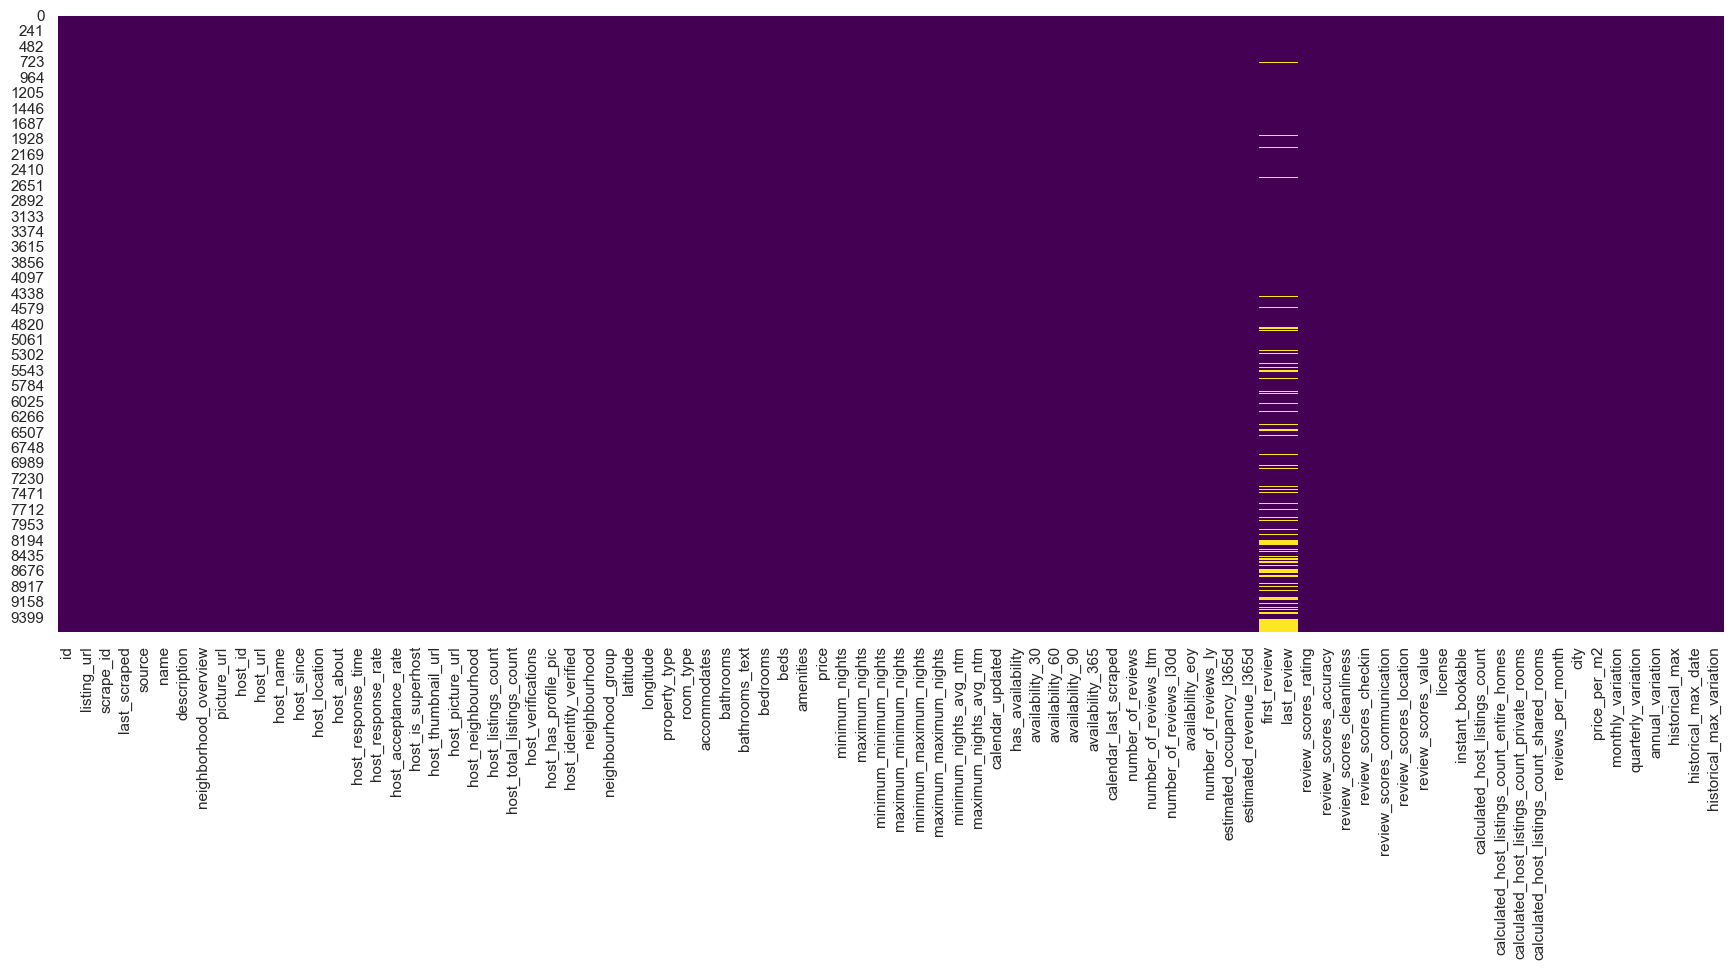

In [3]:
# Mostrar información general del dataset
print("Información general del dataset:")
display(df.info())

# Mostrar valores nulos por columna, filtrar solo los que tienen valores nulos
null_counts = df.isnull().sum()
null_counts = null_counts[null_counts > 0]
if not null_counts.empty:
    print("\nValores nulos por columna:")
    display(null_counts)
else:
    print("\nNo hay valores nulos en el dataset.")

# Guardar el formato actual
prev_float_format = pd.options.display.float_format

# Cambiar el formato temporalmente
pd.options.display.float_format = '{:,.2f}'.format
print("\nEstadísticas descriptivas:")
display(df.describe())

# Restaurar el formato original
pd.options.display.float_format = prev_float_format


# Visualización de los datos nulos
plt.figure(figsize=(len(df.columns) * 0.25, 8))  # Ajusta el ancho según el número de columnas
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.xticks(rotation=90)
plt.show()

### Resumen de la Descripción General del Dataset
- El dataset contiene **9621 filas** y **86 columnas**.
- No hay valores nulos en la mayoría de las columnas, excepto en las relacionadas con reseñas (`first_review`, `last_review`).
- Las estadísticas descriptivas muestran que el precio promedio por metro cuadrado es de **3,838.27€**.

## Cálculo de ROI
Se creó una función `calcular_roi` para calcular el ROI bruto y neto. Esto mejora la reutilización del código y facilita su mantenimiento.

In [4]:
# Calcular ingreso anual estimado por propiedad
df['annual_income'] = df['estimated_revenue_l365d']  # Usar la columna existente de ingresos estimados anuales

# Calcular ROI
def calcular_roi(df, gastos_anuales=3000, average_m2=70):
    """
    Calcula el ROI bruto y neto para cada propiedad en el dataset.
    """
    df['annual_income'] = df['estimated_revenue_l365d']
    df['estimated_property_value'] = df['price_per_m2'] * average_m2
    df['roi'] = (df['annual_income'] / df['estimated_property_value']) * 100
    df['net_annual_income'] = df['annual_income'] - gastos_anuales
    df['net_roi'] = (df['net_annual_income'] / df['estimated_property_value']) * 100
    return df

# Aplicar la función al dataset
df = calcular_roi(df)

# Agrupar por zona y calcular métricas clave
roi_summary = df.groupby('neighbourhood').agg({
    'roi': 'mean',
    'net_roi': 'mean',
    'estimated_property_value': 'mean'
}).reset_index()

# Ordenar por ROI neto
roi_summary = roi_summary.sort_values(by='net_roi', ascending=False)

# Mostrar las zonas con mayor ROI neto
print("Top 10 zonas por ROI neto:")
display(roi_summary.head(10))

Top 10 zonas por ROI neto:


,neighbourhood,roi,net_roi,estimated_property_value
0,Bailen-Miraflores,4.556127,3.049725,199150.0
4,Churriana,4.286053,2.787552,200200.0
9,Puerto de la Torre,3.777711,2.090422,177800.0
3,Centro,3.027553,1.956927,280210.0
5,Ciudad Jardin,3.817571,1.950971,160720.0
1,Campanillas,3.620393,1.640848,151550.0
7,Este,2.426568,1.466936,312620.0
2,Carretera de Cadiz,2.548783,1.330905,246330.0
6,Cruz De Humilladero,2.627094,1.219635,213150.0
8,Palma-Palmilla,2.113647,0.610416,199570.0


### Visualización del ROI Bruto y Neto por Zona

Este gráfico muestra el ROI bruto y neto promedio por zona en Málaga. Esto ayuda a identificar las zonas más rentables para inversión inmobiliaria.

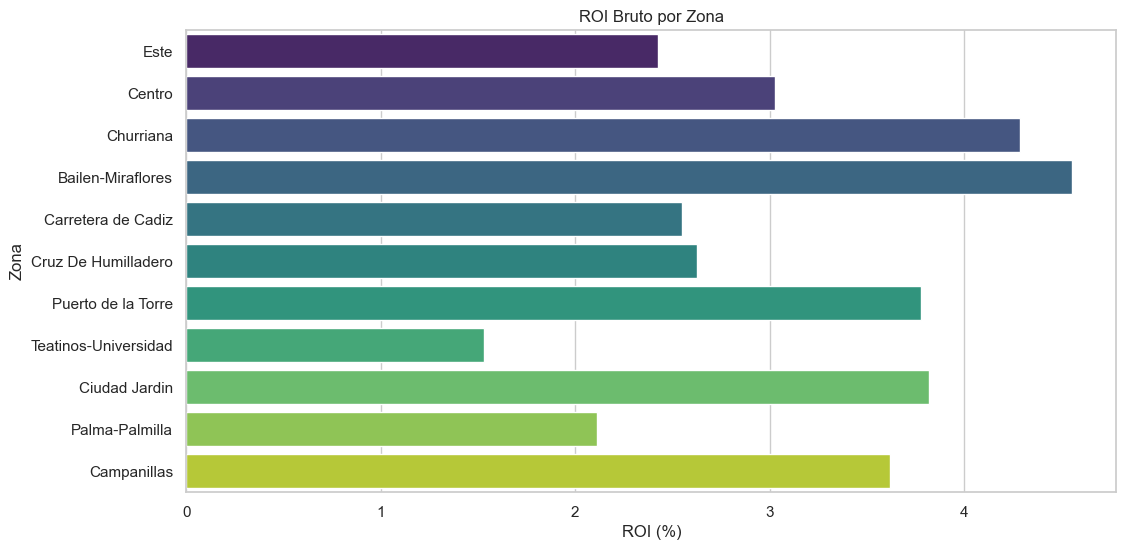

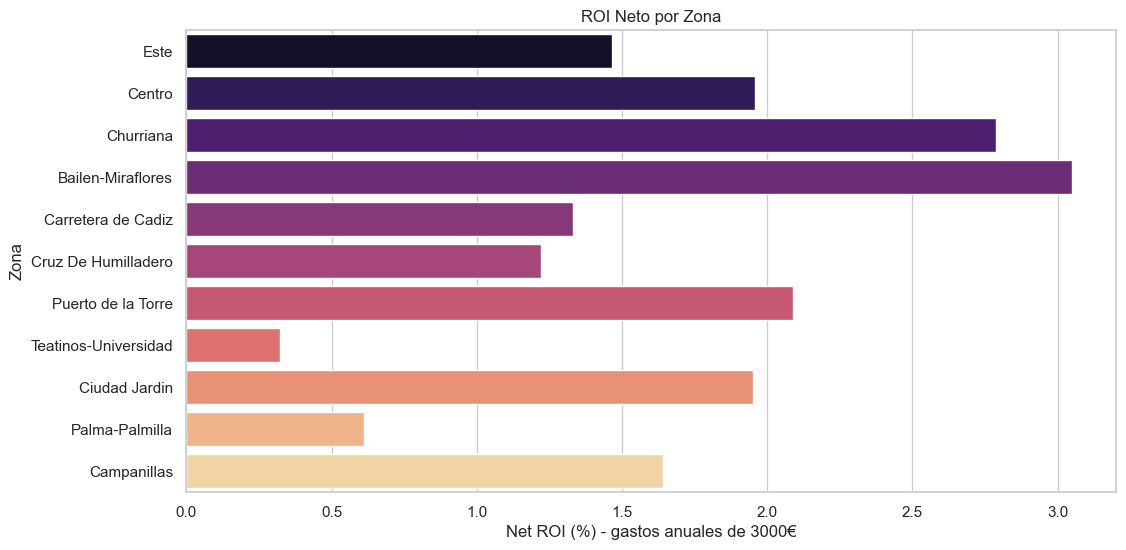

In [5]:
# Visualización del ROI Bruto por Zona
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='roi', y='neighbourhood', palette='viridis', ci=None)  
plt.title("ROI Bruto por Zona")
plt.xlabel("ROI (%)")
plt.ylabel("Zona")
plt.show()

# Visualización del ROI Neto por Zona
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='net_roi', y='neighbourhood', palette='magma', ci=None) 
plt.title("ROI Neto por Zona")
plt.xlabel("Net ROI (%) - gastos anuales de 3000€")
plt.ylabel("Zona")
plt.show()

### Relación entre ROI, Precio por Metro Cuadrado y Ocupación
**Objetivo**: Analizar cómo el precio por metro cuadrado y la ocupación afectan al ROI neto.

### Dashboard Integrado con Filtros Dinámicos
Se agregó la funcionalidad de filtros dinámicos al dashboard interactivo utilizando `plotly`. Esto permite a los usuarios explorar datos específicos por zona o tipo de propiedad.

In [6]:
# Dashboard integrado
fig = px.scatter(
    df,
    x='price_per_m2',
    y='net_roi',
    size='estimated_occupancy_l365d',
    color='neighbourhood',
    hover_name='neighbourhood',
    title="Dashboard Integrado: ROI, Ocupación y Precios por Zona",
    labels={'price_per_m2': 'Precio por m² (€)', 'net_roi': 'ROI Neto (%)', 'estimated_occupancy_l365d': 'Ocupación Estimada (días)'}
)
fig.show()

### Gráfico Interactivo de ROI Neto por Tipo de Propiedad y Zona

**Objetivo**: Identificar qué tipo de propiedad (room_type) genera mayor ROI en cada zona.

Este gráfico interactivo combina ROI neto por tipo de propiedad y zona. Los usuarios pueden explorar los datos pasando el cursor sobre las barras y filtrando por tipo de propiedad. Esto mejora la claridad y la experiencia de usuario en comparación con los gráficos estáticos.

In [7]:
# Calcular el ROI neto promedio por zona y tipo de propiedad
roi_by_room_type = df.groupby(['neighbourhood', 'room_type'])['net_roi'].mean().reset_index()

# Gráfico interactivo de ROI NETO por zona y tipo de propiedad
fig = px.bar(
    roi_by_room_type,
    x='neighbourhood',
    y='net_roi',
    color='room_type',
    barmode='group',
    title="ROI Neto por Zona y Tipo de Propiedad",
    labels={'net_roi': 'ROI Neto (%)', 'neighbourhood': 'Zona', 'room_type': 'Tipo de Propiedad'}
)
fig.update_layout(
    xaxis_title="Zona",
    yaxis_title="ROI Neto (%)",
    legend_title="Tipo de Propiedad",
    bargap=0.2
)
fig.show()

In [8]:
# Gráfico interactivo de ROI por zona y tipo de propiedad (barras agrupadas, vertical)
fig = px.bar(
    roi_summary.head(10).melt(id_vars='neighbourhood', value_vars=['net_roi', 'roi']),
    x='neighbourhood',
    y='value',
    color='variable',
    barmode='group',
    title="Comparación de ROI Neto y Bruto por Zona",
    labels={'value': 'ROI (%)', 'neighbourhood': 'Zona', 'variable': 'Tipo de ROI'}
)
fig.update_layout(
    xaxis_title="Zona",
    yaxis_title="ROI (%)",
    legend_title="Tipo de ROI",
    bargap=0.2
)
fig.show()

# Ranking de zonas con mayor ROI neto
print("Ranking de zonas con mayor ROI neto:")
display(roi_summary[['neighbourhood', 'net_roi']].sort_values(by='net_roi', ascending=False).head(10))

Ranking de zonas con mayor ROI neto:


,neighbourhood,net_roi
0,Bailen-Miraflores,3.049725
4,Churriana,2.787552
9,Puerto de la Torre,2.090422
3,Centro,1.956927
5,Ciudad Jardin,1.950971
1,Campanillas,1.640848
7,Este,1.466936
2,Carretera de Cadiz,1.330905
6,Cruz De Humilladero,1.219635
8,Palma-Palmilla,0.610416


## Análisis de Mercado y Oportunidades de Entrada

En esta sección, se analizarán:
- La distribución de precios por zona y tipo de propiedad.
- La ocupación estimada (`estimated_occupancy_l365d`) para identificar zonas con alta demanda.

In [9]:
# Crear gráfico interactivo de distribución de precios por zona y tipo de propiedad
fig = px.box(
    df,
    x='price',
    y='neighbourhood',
    color='room_type',
    labels={
        'price': 'Precio (€)',
        'neighbourhood': 'Zona',
        'room_type': 'Tipo de Propiedad'
    },
    title="Distribución de Precios por Zona y Tipo de Propiedad"
)

# Ajustar diseño del gráfico
fig.update_layout(
    xaxis_title="Precio (€)",
    yaxis_title="Zona",
    legend_title="Tipo de Propiedad",
    title_font_size=16,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.3,
        xanchor="center",
        x=0.5
    )
)

# Mostrar gráfico interactivo
fig.show()

## Análisis de Amenities y Estrategias de Diferenciación

En esta sección, se analizarán los amenities más comunes y su impacto en el precio y la ocupación.

Top 20 amenities más comunes:
Kitchen: 9107
Wifi: 8802
Hair dryer: 8070
Dishes and silverware: 7877
Iron: 7825
Hot water: 7791
Bed linens: 7490
Microwave: 7422
Essentials: 7363
Hangers: 7350
Refrigerator: 7322
Cooking basics: 7039
TV: 6650
Air conditioning: 6103
Washer: 6030
Shampoo: 5772
Heating: 5602
Toaster: 5492
Freezer: 5438
Coffee maker: 5424


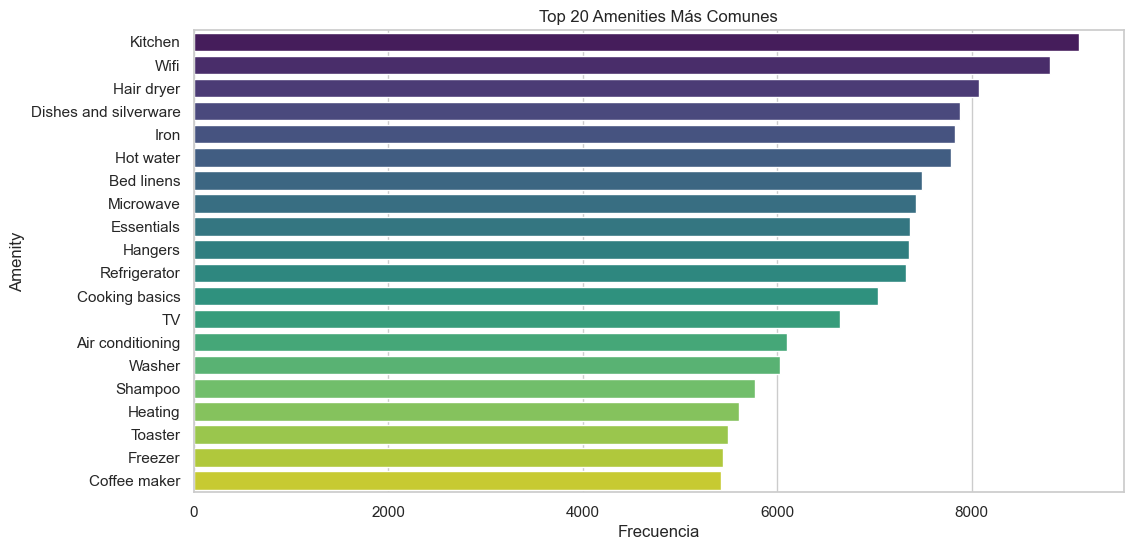

In [10]:
# Extraer y contar los amenities más comunes
from collections import Counter

amenities_list = df['amenities'].apply(lambda x: eval(x))  # Convertir string a lista
all_amenities = [amenity for sublist in amenities_list for amenity in sublist]
amenities_count = Counter(all_amenities).most_common(20)

# Mostrar los 20 amenities más comunes
print("Top 20 amenities más comunes:")
for amenity, count in amenities_count:
    print(f"{amenity}: {count}")

# Visualización de los amenities más comunes
amenities_df = pd.DataFrame(amenities_count, columns=['Amenity', 'Count'])
plt.figure(figsize=(12, 6))
sns.barplot(data=amenities_df, x='Count', y='Amenity', palette='viridis')
plt.title("Top 20 Amenities Más Comunes")
plt.xlabel("Frecuencia")
plt.ylabel("Amenity")
plt.show()

## Benchmarking Competitivo

### Análisis de Correlación entre Métricas Clave
Se agregó un análisis de correlación entre métricas clave como precio, ocupación estimada y ROI neto. Esto ayuda a identificar relaciones significativas entre las variables.

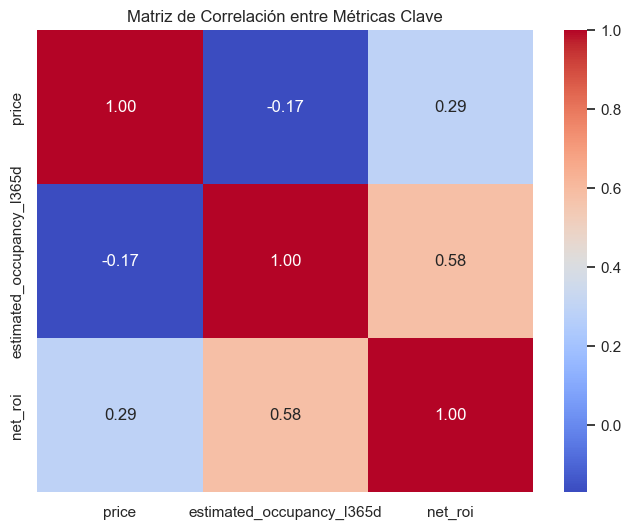

In [11]:
# Calcular correlaciones entre métricas clave
correlation_matrix = df[['price', 'estimated_occupancy_l365d', 'net_roi']].corr()

# Visualización de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlación entre Métricas Clave")
plt.show()

### Análisis de Correlaciones
La matriz de correlación revela las siguientes relaciones clave:
- Existe una correlación positiva moderada entre la ocupación estimada y el ROI neto (0.58).
- El precio tiene una correlación positiva débil con el ROI neto (0.29), indicando que su impacto es limitado.

## Análisis de Precios por Metro Cuadrado

En esta sección, se integrarán los datos de precios por metro cuadrado (`malaga_precio_m2_clean.csv`) con el dataset principal (`malaga_listings_clean.csv`) para analizar la relación entre los precios de las propiedades y los precios promedio por zona.

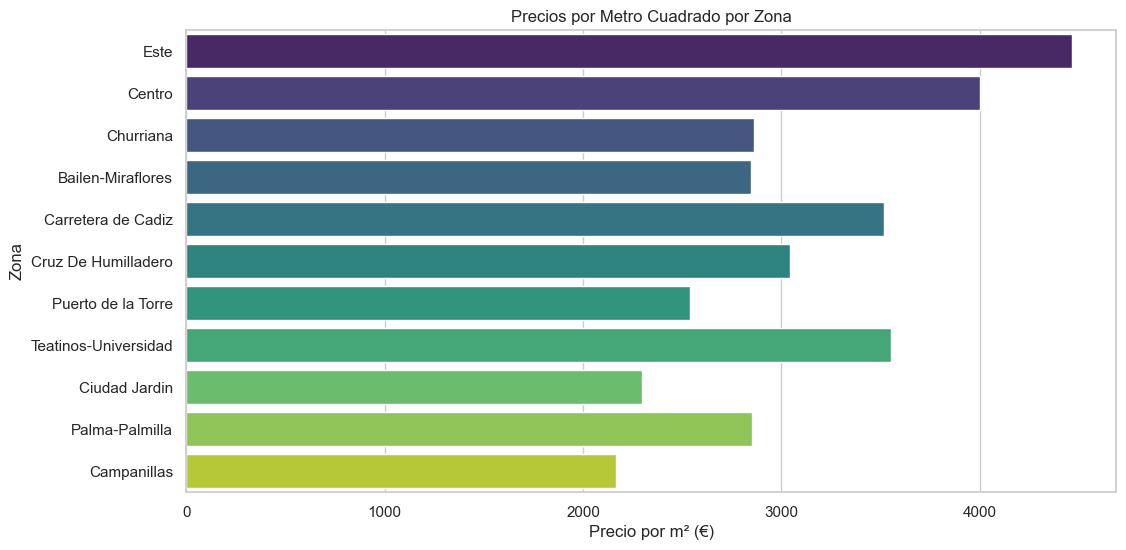

In [12]:
# Visualización de precios por metro cuadrado por zona
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='price_per_m2', y='neighbourhood', palette='viridis')
plt.title("Precios por Metro Cuadrado por Zona")
plt.xlabel("Precio por m² (€)")
plt.ylabel("Zona")
plt.show()

## Integración de Datos Adicionales

En esta sección, se integrarán los datos de estadísticas de crimen (`malaga_crimen_clean.csv`) al análisis exploratorio de datos. Esto permitirá enriquecer el análisis con información sobre seguridad, proporcionando una perspectiva más completa para la toma de decisiones.

In [13]:
# Cargar el dataset de crimenes 'malaga_crimen_clean.csv'
crimen_file_path = (r'/Users/patriciajaquez/Documents/Documents - Patricia’s MacBook Pro/GitHub/Analisis-de-inversion-inmobiliario/data/malaga_crimen_clean.csv')
crimen_df = pd.read_csv(crimen_file_path)

# Mostrar las primeras filas del dataset de crimenes
print("\nPrimeras filas del dataset de crimenes:")
display(crimen_df.head(3))


Primeras filas del dataset de crimenes:


,year,period,crime_type,reported_cases
0,2023,Trimestre 1,Agresión sexual con penetración,160
1,2023,Trimestre 1,Homicidios dolosos y asesinatos consumados,10
2,2023,Trimestre 1,Hurtos,2558


### Análisis de Estadísticas de Crimen en Málaga

En esta sección, se analizarán las estadísticas de crimen en Málaga de forma independiente. Esto permitirá identificar patrones generales de seguridad que pueden influir en las decisiones de inversión y operación.

In [14]:
# Mostrar las primeras filas del dataset de crimen
print("Primeras filas del dataset de crimen:")
display(crimen_df.head())

# Verificar valores únicos en las columnas relevantes
print("\nTipos de crimen únicos:")
print(crimen_df['crime_type'].unique())

# Estadísticas descriptivas de los casos reportados
print("\nEstadísticas descriptivas de los casos reportados:")
print(crimen_df['reported_cases'].describe())

Primeras filas del dataset de crimen:


,year,period,crime_type,reported_cases
0,2023,Trimestre 1,Agresión sexual con penetración,160
1,2023,Trimestre 1,Homicidios dolosos y asesinatos consumados,10
2,2023,Trimestre 1,Hurtos,2558
3,2023,Trimestre 1,"Robos con fuerza en domicilios, establecimient...",2560
4,2023,Trimestre 1,Robos con violencia e intimidación,1720



Tipos de crimen únicos:
['Agresión sexual con penetración'
 'Homicidios dolosos y asesinatos consumados' 'Hurtos'
 'Robos con fuerza en domicilios, establecimientos y otras instalaciones'
 'Robos con violencia e intimidación' 'Secuestro'
 'Sustracciones de vehículos' 'Tráfico de drogas']

Estadísticas descriptivas de los casos reportados:
count      24.000000
mean     1159.416667
std      1034.336373
min         0.000000
25%        75.000000
50%      1265.000000
75%      1942.500000
max      2870.000000
Name: reported_cases, dtype: float64


### Visualización de Tipos de Crimen

En esta sección, se analizarán los tipos de crimen más comunes en Málaga y su frecuencia. Esto ayudará a identificar los problemas de seguridad más relevantes en la ciudad.

Estadísticas de crimen por tipo:


,crime_type,reported_cases
3,"Robos con fuerza en domicilios, establecimient...",7670
4,Robos con violencia e intimidación,5560
2,Hurtos,5406
6,Sustracciones de vehículos,5150
7,Tráfico de drogas,3610
0,Agresión sexual con penetración,360
1,Homicidios dolosos y asesinatos consumados,40
5,Secuestro,30


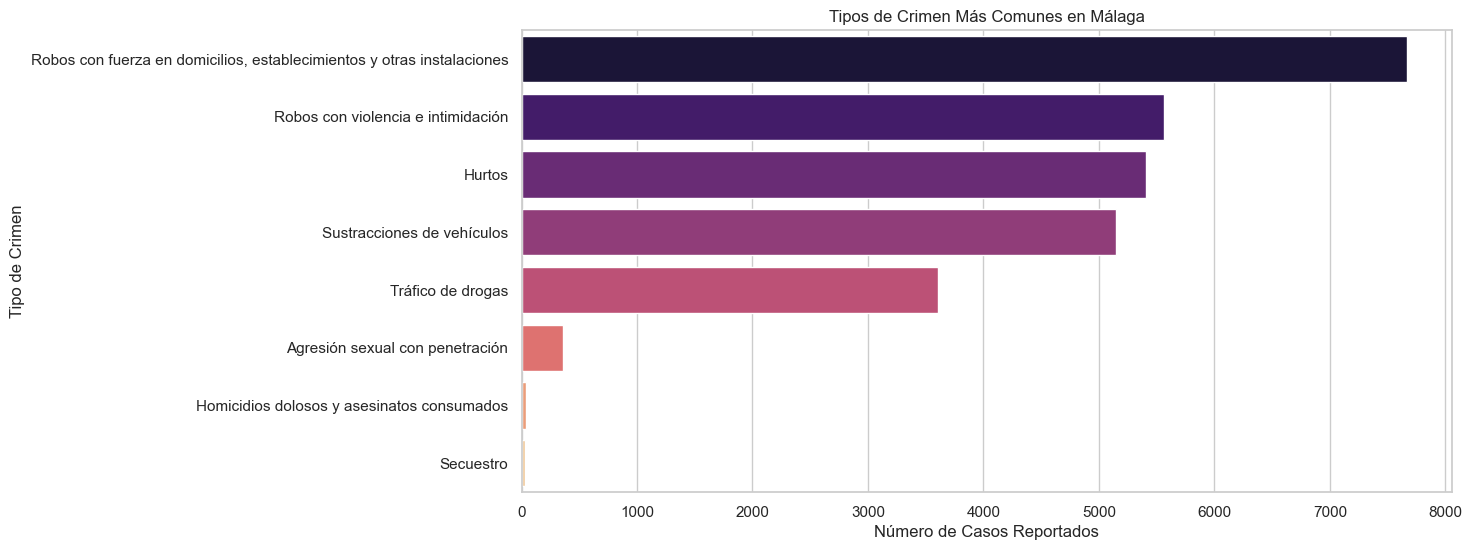

In [15]:
# Agregar una columna de seguridad basada en el número de casos reportados por zona
crimen_summary = crimen_df.groupby(['crime_type'])['reported_cases'].sum().reset_index()

# Ordenar por número de casos reportados
crimen_summary = crimen_summary.sort_values(by='reported_cases', ascending=False)

# Mostrar las estadísticas de crimen por tipo
print("Estadísticas de crimen por tipo:")
display(crimen_summary)

# Visualización de los tipos de crimen más comunes
plt.figure(figsize=(12, 6))
sns.barplot(data=crimen_summary, x='reported_cases', y='crime_type', palette='magma')
plt.title("Tipos de Crimen Más Comunes en Málaga")
plt.xlabel("Número de Casos Reportados")
plt.ylabel("Tipo de Crimen")
plt.show()

### Análisis Temporal de Crimen

En esta sección, se analizará cómo han evolucionado los casos reportados de crimen en Málaga a lo largo del tiempo.

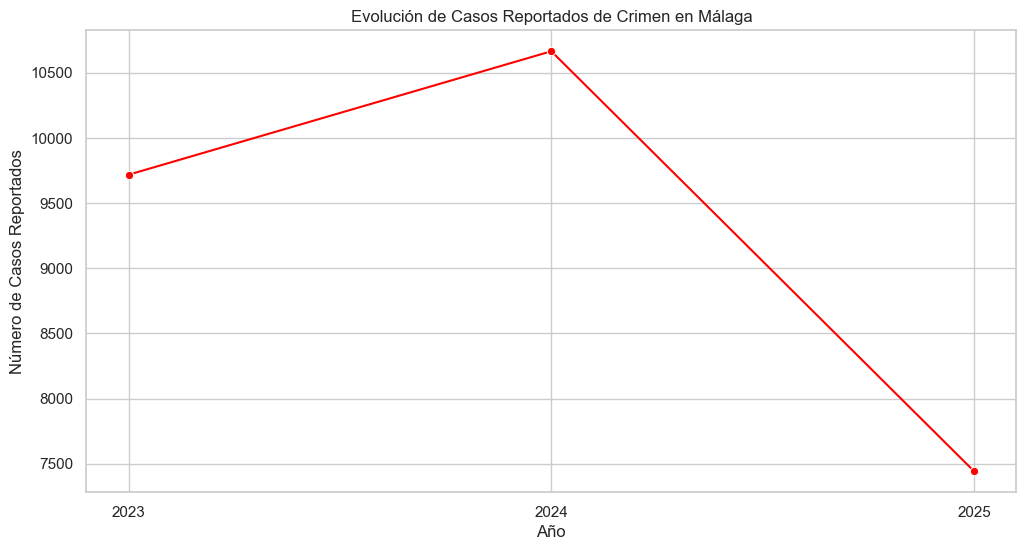

In [16]:
# Agrupar por año y sumar los casos reportados
crimen_by_year = crimen_df.groupby('year')['reported_cases'].sum().reset_index()

# Convertir los años a enteros si son decimales
crimen_by_year['year'] = crimen_by_year['year'].astype(int)

# Visualización de la evolución de casos reportados por año
plt.figure(figsize=(12, 6))
sns.lineplot(data=crimen_by_year, x='year', y='reported_cases', marker='o', color='red')
plt.title("Evolución de Casos Reportados de Crimen en Málaga")
plt.xlabel("Año")
plt.ylabel("Número de Casos Reportados")
plt.xticks(crimen_by_year['year'])  # Asegurar que los años sean mostrados como enteros
plt.show()

### Conclusiones sobre Seguridad en Málaga

1. Los tipos de crimen más comunes en Málaga son:
 - Robos con fuerza en domicilios, establecimientos y otras instalaciones.
 - Robos con violencia e intimidación.
 - Hurtos.
2. La evolución temporal muestra que los casos reportados de crimen en Málaga tuvieron un aumento constante desde el año 2022 hasta el año 2024, alcanzando un pico en 2024 con más de 10,500 casos reportados. Sin embargo, en 2025 se observa una caída significativa en el número de casos reportados, descendiendo a menos de 7,500 casos. Esto podría indicar un cambio en las políticas de seguridad, una mejora en las condiciones sociales, o una variación en los sistemas de reporte.
3. Estas estadísticas pueden influir en las decisiones de inversión, especialmente en zonas con alta incidencia de crimen.

## Resumen Visual de Zonas Recomendadas
Se agregó un gráfico resumen que destaca las zonas más recomendadas basándose en el ROI ajustado por seguridad. Esto facilita la interpretación de los resultados.

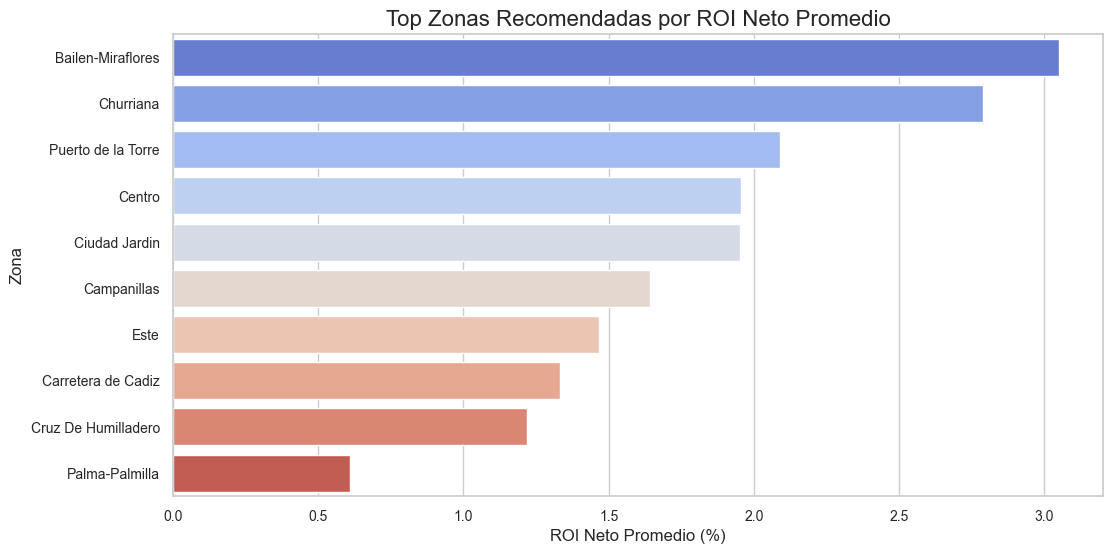

In [17]:
# Verificar que las columnas necesarias estén disponibles
if 'neighbourhood' in df.columns and 'net_roi' in df.columns:
    # Agrupar por zona y calcular el ROI promedio
    zonas_recomendadas = df.groupby('neighbourhood')['net_roi'].mean().reset_index()
    zonas_recomendadas = zonas_recomendadas.sort_values(by='net_roi', ascending=False).head(10)

    # Visualización de las zonas más recomendadas
    plt.figure(figsize=(12, 6))
    sns.barplot(data=zonas_recomendadas, x='net_roi', y='neighbourhood', palette='coolwarm')
    plt.title("Top Zonas Recomendadas por ROI Neto Promedio", fontsize=16)
    plt.xlabel("ROI Neto Promedio (%)", fontsize=12)
    plt.ylabel("Zona", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()
else:
    # Si las columnas no están disponibles, mostrar un mensaje
    print("No se encontraron las columnas necesarias ('neighbourhood' y 'net_roi') en el dataset principal.")

In [18]:
# Guardar el DataFrame actualizado con ROI 
df.to_csv('/Users/patriciajaquez/Documents/Documents - Patricia’s MacBook Pro/GitHub/Analisis-de-inversion-inmobiliario/data/malaga_completed_clean.csv', index=False)

## Conclusiones y Próximos Pasos

### Hallazgos Clave:
1. Las zonas con mayor ROI neto son:
 - Bailen-Miraflores
 - Churriana
 - Puerto de la Torre
2. Las propiedades con precios por metro cuadrado más accesibles tienden a tener mayor ocupación estimada.
3. Los amenities más comunes incluyen **Kitchen, Wifi, Hair dryer, Dishes and silverware, Iron, Hot water, Bed linens, Microwave, Essentials**.